# Predicting Student Alcohol Consumption

## Basic Info

Group Members:

Elizabeth Armstrong  
elizabeth.armstrong@chemeng.utah.edu  
u0726588  

Nipun Gunawardena  
1.nipun@gmail.com  
u0624269  

Karen DeMille   
karen.demille@utah.edu   
u0787257    

## Background and Motivation
As recommended in class, our first goal was to find a dataset that was easily accessible but interesting. In the UCI Machine Learning Repository, we found a dataset describing high school student alcohol consumption. This is a potentially interesting dataset for several reasons. Underage drinking is a health problem, and understanding it better can lead to better treatment. As an alternate conclusion, rehabilitation efforts can be better focused if drinking isn't a large problem. Additionally, it would be interesting to see how alcohol consumption correlates with socioeconomic and educational factors. Finally, it would be very informative if we could find another dataset to compare with. If student alcohol consumption correlates well with general population alcohol consumption, future health problems can be prevented.

All the members of our group are engineers. While this topic doesn't really relate to any of our research topics, this project gives us the opportunity to work with human-oriented data, something that is sometimes lacking in our field. Ultimately, determining what factors lead to alcohol consumption can help policymakers come to better decisions.

## Project Objectives
This project will have two main objectives: General data exploration and alcohol consumption tendency prediction. General data exploration will let us find factors that are important to alcohol consumption in students, and any other interesting information. Developing a tool to predict alcohol consumption will be a proof of concept that could be used by future institutions. These objectives can be completed with the current tools and data we have access to. However, if we can find or gather more alcohol consumption data, we would like to also see how the existing dataset matches the new one. This extra data can also be used to test our predictive tool. Since our dataset is already quite clean, we are planning on spending most of our time on analysis.  

However, we have recently found other datasets that we may be able to incorporate into this project [2].  From these datasets, we hope to compare the alcohol consumption practices of students in the United States with the alcohol consumption practices of students in Portugal.  We are interested in seeing whether different cultures affect ones drinking practices.

## Data

We plan to use the data folder for the Student Alcohol Consumption Data Set from the UCI Machine Learning Repository. This webpage can be accessed at http://archive.ics.uci.edu/ml/datasets/STUDENT+ALCOHOL+CONSUMPTION. The data was collected at two secondary schools in Portugal. Datasets for attributes of secondary school students in a math course and a Portuguese language course can be downloaded as CSV files, which are part of a compressed folder accessed through the Data Folder link or directly from http://archive.ics.uci.edu/ml/machine-learning-databases/00356/. This data has been downloaded and included in the same folder as the Jupyter notebook to allow for easy access and importing. The file is read and printed below using pandas. The data attributes are separated by semicolons, making “;” the delimiter.

With permission, we would also like to create a survey for University of Utah students that collects some data on similar topics to the attributes in the student dataset from the UCI dataset. We would then hope to see where our class fits in to the model we will be creating for predicting alcohol consumption based on other traits. These attributes include sex, age, home to school travel time, weekly study time, extra-curricular activities, workday alcohol consumption, and weekend alcohol consumption to name a few.

There are 33 total attributes recorded in the UCI data sets to choose from. A full list and description of attributes included can be found on the website.

# Data Cleaning and Aquisition

Most of the data entries are strings, so the string entries will have to be converted to an integer value for processing. Many are binary ‘yes’ or ‘no’ answers, but some have more than two choices such as the father or mother’s job being ‘teacher’, ‘health’ care related, civil ‘services’, ‘at_home’, or ‘other.’

There are 395 entries for the math course data set and 649 entries for the Portuguese language dataset, giving a total of 1044 data entries. These datasets could be combined into one large set for analysis since the number of different attributes considered are the same for each course. There are some students that belong to both datasets. When the datasets are combined, we must find the duplicates to properly merge the two datasets.

In [2]:
import pandas as pd
import numpy as np

## Load Data
Load data and print number of points.

In [3]:
mathclass = pd.read_csv("student-mat.csv",delimiter=";") #math course csv
portclass = pd.read_csv("student-por.csv",delimiter=";") #portuguese language course csv

print('Math class data points: {}'.format(len(mathclass)))
print('Portuguese class data points: {}'.format(len(portclass)))
print('Total data points: {}'.format(len(mathclass)+len(portclass)))

Math class data points: 395
Portuguese class data points: 649
Total data points: 1044


## Define groups of columns

Groups of columns need to be defined for finding duplicates and merging datasets.

In [4]:
#define lists of column names
all_courseindependent = ['school','sex','age','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','reason','guardian', \
                         'traveltime','studytime','failures','schoolsup','famsup','activities','nursery','higher','internet', \
                         'romantic','famrel','freetime','goout','Dalc','Walc','health']
all_ = ['school','sex','age','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','reason','guardian','traveltime', \
       'studytime','failures','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic','famrel', \
       'freetime','goout','Dalc','Walc','health','absences','G1','G2','G3']
student_merge = ['school','sex','age','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','reason','nursery','internet']
math_columns = ['school','sex','age','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','reason','guardian', \
                'traveltime','studytime','failures','schoolsup','famsup','paid_math','activities','nursery','higher', \
                'internet','romantic','famrel','freetime','goout','Dalc','Walc','health','absences_math','G1_math', \
                'G2_math','G3_math','math']
port_columns = ['school','sex','age','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','reason','guardian', \
                'traveltime','studytime','failures','schoolsup','famsup','paid_port','activities','nursery','higher', \
                'internet','romantic','famrel','freetime','goout','Dalc','Walc','health','absences_port','G1_port', \
                'G2_port','G3_port','port']

## Choose columns to merge datasets on

The data source states that there are 382 students that belong to both classes (math and Portuguese).  Included with the datasets was an example file of how to find the students which are included both datasets.  The example file merged the two datasets on the following columns: school, sex, age, address, famsize, Pstatus, Medu, Fedu, Mjob, Fjob, reason, nursery, and internet.

In [5]:
bothclass = pd.concat([portclass, mathclass])
print('Number of students in both classes: {}'.format(bothclass.duplicated(keep='first',subset=student_merge).sum()))

Number of students in both classes: 382


Before going forward with the list of columns provided by the source, we will test whether the list includes enough columns to avoid incorrectly labeling data as a duplicate.

In [6]:
#determine whether there are duplicates in the individual datasets
print('Number of duplicates found in Portuguese class dataset: {}'. \
      format(portclass.duplicated(keep='first',subset=student_merge).sum()))
print('Number of duplicates found in math class dataset: {}'. \
      format(mathclass.duplicated(keep='first',subset=student_merge).sum()))

Number of duplicates found in Portuguese class dataset: 12
Number of duplicates found in math class dataset: 4


Since duplicates appear to be present in the individual datasets when the list of columns provided by the source was used to find duplicates, we will determine if they are actually duplicates by comparing all of the columns in each dataframe.

In [7]:
#determine whether there are duplicates in the individual datasets
print('Number of duplicates found in Portuguese class dataset: {}'. \
      format(portclass.duplicated(keep='first',subset=all_).sum()))
print('Number of duplicates found in math class dataset: {}'. \
      format(mathclass.duplicated(keep='first',subset=all_).sum()))

Number of duplicates found in Portuguese class dataset: 0
Number of duplicates found in math class dataset: 0


When we search for duplicates using all of the columns in each dataframe, no duplicates are found.  Thus, we can assume that the list of columns provided by the source for merging the dataframes is not suffucient to find true duplicates between the two datasets.  To determine whether the set of all columns will find duplicates betwwen the two datasets, we search for duplicates in the concatenated dataframe, considering all columns.

In [8]:
print('Number of students in both classes: {}'.format(bothclass.duplicated(keep='first',subset=all_).sum()))

Number of students in both classes: 0


Using all of the columns to find duplicates between the datasets resulted in 0 duplicates being found.  Thus, there may be some columns which are based on the class which the student's data was aquired in.  From information about the columns, it appears that the following columns are class-specific:

* paid: extra paid classes within the course subject
* absences: number of school absences
* G1: first period grade
* G2: second period grade
* G3: third period grade

The class-specific columns were removed from the list of columns to consider when finding duplicates.  

In [9]:
#determine whether there are duplicates in the individual datasets
print('Number of duplicates found in Portuguese class dataset: {}'. \
      format(portclass.duplicated(keep='first',subset=all_courseindependent).sum()))
print('Number of duplicates found in math class dataset: {}'. \
      format(mathclass.duplicated(keep='first',subset=all_courseindependent).sum()))

Number of duplicates found in Portuguese class dataset: 2
Number of duplicates found in math class dataset: 0


In [10]:
print('Number of students in both classes: {}'.format(bothclass.duplicated(keep='first',subset=all_courseindependent).sum()))

Number of students in both classes: 322


When all columns except for the class-specific columns were considered, only 2 duplicates were found in the Portuguese class dataset and no duplicates were found in the math class.

In order to verify that all class-independent columns should be used to find duplicates between the two datasets, we added or omitted one column at a time from the list.  Whenever one of the five class-specific columns were included in the list, the number of duplicates reduced significantly.  On the other hand, when one class-independent column was omitted from the list, the number of duplicates did not change.

We will remove the 2 duplicate Portuguese class data points since the class-independent column list is the best we can do for finding duplicates between the Portuguese and math class datasets.  By removing these 2 false duplicates from the Portuguese class dataset, we can ensure that the merging of datasets is accurate.

In [11]:
mathclass['paid_math'] = mathclass['paid']
mathclass['absences_math'] = mathclass['absences']
mathclass['G1_math'] = mathclass['G1']
mathclass['G2_math'] = mathclass['G2']
mathclass['G3_math'] = mathclass['G3']
mathclass['math'] = 1

portclass['paid_port'] = portclass['paid']
portclass['absences_port'] = portclass['absences']
portclass['G1_port'] = portclass['G1']
portclass['G2_port'] = portclass['G2']
portclass['G3_port'] = portclass['G3']
portclass['port'] = 1

mathclass_merge = mathclass[math_columns]
portclass_merge = portclass[port_columns]

#remove duplicates from individual datasets based on class-independent column set
portclass_nodup = portclass_merge.drop_duplicates(subset=all_courseindependent,keep='first')
mathclass_nodup = mathclass_merge.drop_duplicates(subset=all_courseindependent,keep='first')

Merge mathclass and portclass dataframes

In [12]:
bothclass = pd.merge(portclass_nodup, mathclass_nodup, how='outer', on=all_courseindependent)
print(bothclass.columns.tolist())

bothclass

['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid_port', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences_port', 'G1_port', 'G2_port', 'G3_port', 'port', 'paid_math', 'absences_math', 'G1_math', 'G2_math', 'G3_math', 'math']


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,G1_port,G2_port,G3_port,port,paid_math,absences_math,G1_math,G2_math,G3_math,math
0,GP,F,18.0,U,GT3,A,4.0,4.0,at_home,teacher,...,0.0,11.0,11.0,1.0,no,6.0,5.0,6.0,6.0,1.0
1,GP,F,17.0,U,GT3,T,1.0,1.0,at_home,other,...,9.0,11.0,11.0,1.0,no,4.0,5.0,5.0,6.0,1.0
2,GP,F,15.0,U,LE3,T,1.0,1.0,at_home,other,...,12.0,13.0,12.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,GP,F,15.0,U,GT3,T,4.0,2.0,health,services,...,14.0,14.0,14.0,1.0,yes,2.0,15.0,14.0,15.0,1.0
4,GP,F,16.0,U,GT3,T,3.0,3.0,other,other,...,11.0,13.0,13.0,1.0,yes,4.0,6.0,10.0,10.0,1.0
5,GP,M,16.0,U,LE3,T,4.0,3.0,services,other,...,12.0,12.0,13.0,1.0,yes,10.0,15.0,15.0,15.0,1.0
6,GP,M,16.0,U,LE3,T,2.0,2.0,other,other,...,13.0,12.0,13.0,1.0,no,0.0,12.0,12.0,11.0,1.0
7,GP,F,17.0,U,GT3,A,4.0,4.0,other,teacher,...,10.0,13.0,13.0,1.0,no,6.0,6.0,5.0,6.0,1.0
8,GP,M,15.0,U,LE3,A,3.0,2.0,services,other,...,15.0,16.0,17.0,1.0,yes,0.0,16.0,18.0,19.0,1.0
9,GP,M,15.0,U,GT3,T,3.0,4.0,other,other,...,12.0,12.0,13.0,1.0,yes,0.0,14.0,15.0,15.0,1.0


To make sure that the merge was done properly, the numbers of students represented from each class are found.

In [13]:
#check that numbers work out

print('Total datasets from both classes: {}'.format(len(mathclass_nodup)+len(portclass_nodup)))
print('Length of dataset after duplicates removed: {}'.format(len(bothclass)))
print('Length of mathclass dataset: {}'.format(len(mathclass_nodup)))
print('Number of mathclass only in bothclass: {}'.format(len(bothclass[(bothclass['math']==1) & (bothclass['port']!=1)])))
print('Length of portclass dataset: {}'.format(len(portclass_nodup)))
print('Number of portclass only in bothclass: {}'.format(len(bothclass[(bothclass['math']!=1) & (bothclass['port']==1)])))
print('Number of mathclass AND portclass in bothclass: {}'.format(len(bothclass[(bothclass['math']==1) & (bothclass['port']==1)])))

Total datasets from both classes: 1042
Length of dataset after duplicates removed: 722
Length of mathclass dataset: 395
Number of mathclass only in bothclass: 75
Length of portclass dataset: 647
Number of portclass only in bothclass: 327
Number of mathclass AND portclass in bothclass: 320


The number of data points in the Portuguese class and math class add up to the total dataset length if no duplicates are removed.  Furthermore, when the number of duplicates is removed from each each class dataset, the number of students in only the math or Portuguese class is correct.  The number of duplicates plus the number of datapoints after duplicates were removed equals the total number of datasets.

## Assign Integer Values to String Entries

In [14]:
bothclass['school_num'] = bothclass['school'].map({'GP':0, 'MS':1})
bothclass['sex_num'] = bothclass['sex'].map({'F':0, 'M':1})
bothclass['address_num'] = bothclass['address'].map({'U':0, 'R':1})
bothclass['famsize_num'] = bothclass['famsize'].map({'LE3':0, 'GT3':1})
bothclass['Pstatus_num'] = bothclass['Pstatus'].map({'T':0, 'A':1})
bothclass['Mjob_num'] = bothclass['Mjob'].map({'teacher':0, 'health':1, 'services':2, 'at_home':3, 'other':4})
bothclass['Fjob_num'] = bothclass['Fjob'].map({'teacher':0, 'health':1, 'services':2, 'at_home':3, 'other':4})
bothclass['reason_num'] = bothclass['reason'].map({'home':0, 'reputation':1, 'course':2, 'other':3})
bothclass['guardian_num'] = bothclass['guardian'].map({'mother':0, 'father':1, 'other':2})
bothclass['schoolsup_num'] = bothclass['schoolsup'].map({'yes':0, 'no':1})
bothclass['famsup_num'] = bothclass['famsup'].map({'yes':0, 'no':1})
bothclass['activities_num'] = bothclass['activities'].map({'yes':0, 'no':1})
bothclass['nursery_num'] = bothclass['nursery'].map({'yes':0, 'no':1})
bothclass['higher_num'] = bothclass['higher'].map({'yes':0, 'no':1})
bothclass['internet_num'] = bothclass['internet'].map({'yes':0, 'no':1})
bothclass['romantic_num'] = bothclass['romantic'].map({'yes':0, 'no':1})
bothclass['paid_port_num'] = bothclass['paid_port'].map({'yes':0, 'no':1})
bothclass['paid_math_num'] = bothclass['paid_math'].map({'yes':0, 'no':1})

In [15]:
#combine columns that are class-dependent
bothclass = bothclass.fillna(value=0)
bothclass['paid_num'] = bothclass['paid_port_num'] + bothclass['paid_math_num'] #number of paid classes
bothclass['paid_num'] = bothclass['paid_num'].map({2:1, 1:1, 0:0}) #make 1 or 0 value rather than 0, 1, or 2
bothclass['absences'] = (bothclass['absences_port'] + bothclass['absences_math'])/2 #average absences per class
bothclass['G1'] = (bothclass['G1_port'] + bothclass['G1_math'])/2 #average first period grade
bothclass['G2'] = (bothclass['G2_port'] + bothclass['G2_math'])/2 #average second period grade
bothclass['G3'] = (bothclass['G3_port'] + bothclass['G3_math'])/2 #average third period grade

bothclass[['paid_num','absences','G1','G2','G3']]

,paid_num,absences,G1,G2,G3
0,1,5.0,2.5,8.5,8.5
1,1,3.0,7.0,8.0,8.5
2,1,3.0,6.0,6.5,6.0
3,1,1.0,14.5,14.0,14.5
4,1,2.0,8.5,11.5,11.5
5,1,8.0,13.5,13.5,14.0
6,1,0.0,12.5,12.0,12.0
7,1,4.0,8.0,9.0,9.5
8,1,0.0,15.5,17.0,18.0
9,1,0.0,13.0,13.5,14.0


## Save data to new csv

In [16]:
bothclass.to_csv('CleanData.csv', sep=',', na_rep=np.nan)

# Exploratory data analysis

In [17]:
#imports
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm

import scipy
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6)

## Import cleaned dataset and observe basic statistics

In [18]:
#Import merged, cleaned data set, print shape and data types and basic stats
#data set comes from Data_Cleanup_v2 in Data Cleanup
Cleaned_data = pd.read_csv("CleanData.csv")
print(Cleaned_data.shape)
print(Cleaned_data.dtypes, '\n')
Cleaned_data.describe()

(722, 64)
Unnamed: 0          int64
school             object
sex                object
age               float64
address            object
famsize            object
Pstatus            object
Medu              float64
Fedu              float64
Mjob               object
Fjob               object
reason             object
guardian           object
traveltime        float64
studytime         float64
failures          float64
schoolsup          object
famsup             object
paid_port          object
activities         object
nursery            object
higher             object
internet           object
romantic           object
famrel            float64
freetime          float64
goout             float64
Dalc              float64
Walc              float64
health            float64
                   ...   
port              float64
paid_math          object
absences_math     float64
G1_math           float64
G2_math           float64
G3_math           float64
math              float64
sc

,Unnamed: 0,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,...,higher_num,internet_num,romantic_num,paid_port_num,paid_math_num,paid_num,absences,G1,G2,G3
count,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,...,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000
mean,360.500000,16.818560,2.484765,2.286704,1.566482,1.918283,0.344875,3.915512,3.200831,3.195291,...,0.113573,0.232687,0.623269,0.842105,0.296399,0.929363,3.199446,8.096260,8.119114,8.189058
std,208.567735,1.271272,1.126119,1.090657,0.747913,0.816082,0.730859,0.947913,1.061153,1.173839,...,0.317512,0.422837,0.484903,0.364895,0.456986,0.256395,4.375775,3.896469,3.990411,4.200826
min,0.000000,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,0.000000,0.000000
25%,180.250000,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,5.000000,5.000000,5.000000
50%,360.500000,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,2.000000,7.000000,7.000000,7.000000
75%,540.750000,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,4.000000,11.000000,11.500000,11.500000
max,721.000000,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,45.000000,18.500000,18.500000,18.500000


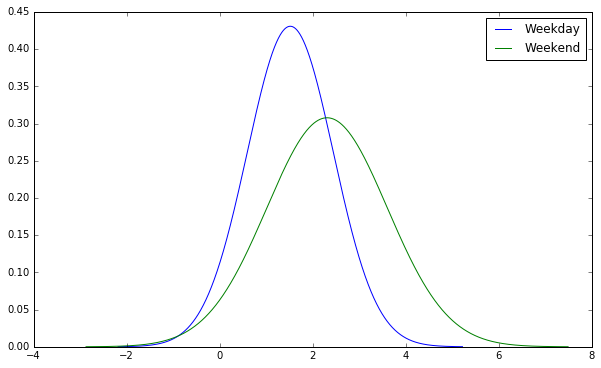

In [19]:
#cumulative distribution of weekday and weekend alcohol consumption from cleaned data set
mean_wd = Cleaned_data['Dalc'].mean()
mean_we = Cleaned_data['Walc'].mean()
std_wd = Cleaned_data['Dalc'].std()
std_we = Cleaned_data['Walc'].std()

x_wd = scipy.arange(mean_wd-4*std_wd,mean_wd+4*std_wd,0.001)
dist_wd = norm.pdf(x_wd, loc=mean_wd, scale=std_wd)
plt.plot(x_wd,dist_wd,label='Weekday')

x_we = scipy.arange(mean_we-4*std_we,mean_we+4*std_we,0.001)
dist_we = norm.pdf(x_we, loc=mean_we, scale=std_we)
plt.plot(x_we,dist_we,label='Weekend')

plt.legend(loc='best')
plt.show()

Weekday and weekend alcohol consumption don't appear to be very different from each other. Which might be expected as a person that drinks more on weekdays is also expected to drink more on weekends.  In our final analysis, we will perform hypothesis tests to determine if weekday and weekend alcohol consumption is similar.

In [20]:
# Only use columns with numbers involved:
chosen_columns = ['Dalc', 'Fedu', 'G1', 'G2', 'G3', 'Medu', 'Walc', 'absences', 'age', 
                  'failures', 'famrel', 'freetime', 'goout', 'health', 'math', 
                  'port', 'studytime', 'traveltime', 'school_num', 'sex_num','address_num', 
                  'famsize_num', 'Pstatus_num', 'Mjob_num', 'Fjob_num','reason_num', 
                  'guardian_num', 'schoolsup_num', 'famsup_num', 'activities_num','nursery_num', 
                  'higher_num', 'internet_num', 'romantic_num', 'paid_num']

Cleaned_data = Cleaned_data[chosen_columns]

In [21]:
#cleaned data - only numbers
print(Cleaned_data.shape, '\n')
print(Cleaned_data.describe(), '\n')

(722, 35) 

             Dalc        Fedu          G1          G2          G3        Medu  \
count  722.000000  722.000000  722.000000  722.000000  722.000000  722.000000   
mean     1.520776    2.286704    8.096260    8.119114    8.189058    2.484765   
std      0.925961    1.090657    3.896469    3.990411    4.200826    1.126119   
min      1.000000    0.000000    1.500000    0.000000    0.000000    0.000000   
25%      1.000000    1.000000    5.000000    5.000000    5.000000    2.000000   
50%      1.000000    2.000000    7.000000    7.000000    7.000000    2.000000   
75%      2.000000    3.000000   11.000000   11.500000   11.500000    4.000000   
max      5.000000    4.000000   18.500000   18.500000   18.500000    4.000000   

             Walc    absences         age    failures     ...      reason_num  \
count  722.000000  722.000000  722.000000  722.000000     ...      722.000000   
mean     2.311634    3.199446   16.818560    0.344875     ...        1.409972   
std      1.2959

Number counts for weekend alcohol consumption ratings:
1.0    270
2.0    162
3.0    138
4.0     99
5.0     53
Name: Walc, dtype: int64 

Number counts for weekday alcohol consumption ratings:
1.0    490
2.0    144
3.0     51
5.0     19
4.0     18
Name: Dalc, dtype: int64 



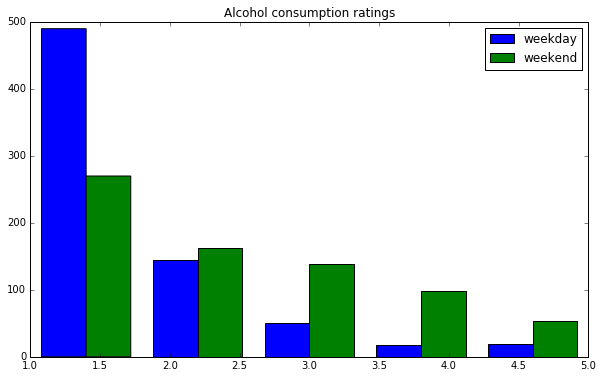

In [22]:
print('Number counts for weekend alcohol consumption ratings:')
print(Cleaned_data['Walc'].value_counts(), '\n')
print('Number counts for weekday alcohol consumption ratings:')
print(Cleaned_data['Dalc'].value_counts(), '\n')

data =[Cleaned_data["Dalc"], Cleaned_data["Walc"]]
n_bins = 5
plt.hist(data, n_bins, label=['weekday','weekend'],histtype='bar');
plt.title('Alcohol consumption ratings')
plt.legend(loc='upper right')
plt.show()

More of the students ranked their alcohol consumption higher on weekends than they did on weekdays. (53 compared to 19 for a rating of 5 or very high). Also, more of the students ranked their alcohol consumption lower on weekdays than they did on weekends. (490 compared to 270 for a rating of 1 or very low). Most students had lower alcohol consumption ratings for both weekends and weekdays, with the highest count being a rating of 1 for a weekday.

In [23]:
print(Cleaned_data.corr())


                    Dalc      Fedu        G1        G2        G3      Medu  \
Dalc            1.000000 -0.009340 -0.140386 -0.133925 -0.139447 -0.013662   
Fedu           -0.009340  1.000000  0.304687  0.301265  0.290571  0.643285   
G1             -0.140386  0.304687  1.000000  0.966036  0.946660  0.345109   
G2             -0.133925  0.301265  0.966036  1.000000  0.973615  0.348404   
G3             -0.139447  0.290571  0.946660  0.973615  1.000000  0.339901   
Medu           -0.013662  0.643285  0.345109  0.348404  0.339901  1.000000   
Walc            0.618160  0.024033 -0.121173 -0.117688 -0.116694 -0.033332   
absences        0.114163  0.111805  0.151397  0.136947  0.145267  0.137691   
age             0.134580 -0.135485 -0.215848 -0.214732 -0.220816 -0.119645   
failures        0.103143 -0.179895 -0.416399 -0.426899 -0.444780 -0.174764   
famrel         -0.084117  0.031512  0.068295  0.070865  0.080122  0.031925   
freetime        0.122081  0.002910 -0.026821 -0.038739 -0.040888

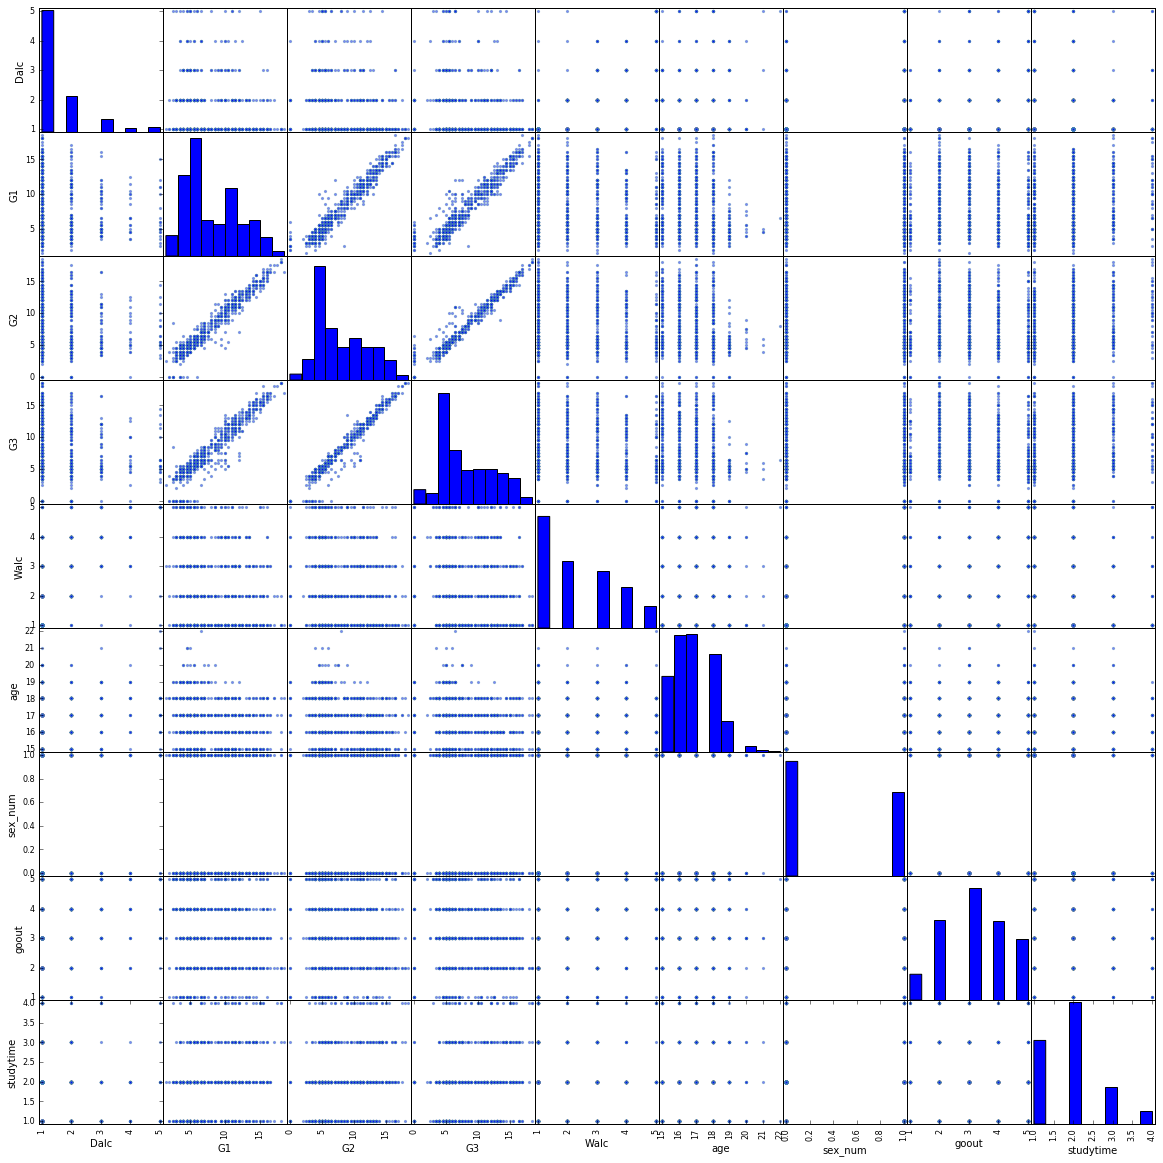

In [24]:
#looking for correlations
scatter_columns = ['Dalc', 'G1', 'G2', 'G3', 'Walc','age', 'sex_num','goout','studytime']

pd.scatter_matrix(
    Cleaned_data[scatter_columns],
    figsize=(20, 20), diagonal='hist', color="#4682B4"); 

No correlations between weekday or weekend alcohol consumption ratings with any other variables really stand out. There is a correlation of about 62% between weekend and weekday alcohol consumption. This is expected to be high as someone that drinks more during the weekday is expected to drink more during the weekend. There is also a relatively high correlation for both of these variables with a students ranking of how often they go out, especially with weekend alcohol consumption (~41%). This is also expected as going out more often tends to lead to drinking more often. Whether you are male or female, and studytime also has a fair correlation with alcohol consumption.

## Multilinear regression

In [36]:
#Some multilinear regression setup:
model = sm.ols(formula="Walc ~ Dalc + goout + sex_num + studytime", data=Cleaned_data)
model_result = model.fit()
print(model_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   Walc   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     168.2
Date:                Thu, 01 Dec 2016   Prob (F-statistic):          1.53e-101
Time:                        20:28:00   Log-Likelihood:                -972.19
No. Observations:                 722   AIC:                             1954.
Df Residuals:                     717   BIC:                             1977.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.4452      0.147      3.023      0.0

This model tries to predict the weekend alcohol consumption based on the weekday alcohol consumption, the frequency of outings, the sex, and the category for time spent on studying. The R-squared value for this model is almost 48.4%. This isn't great, so different models should be considered. The p-values for all the variables are very low, which is good suggesting the variables chosen really are independent. We could perhaps try including all of the variables too in order to see how the R-squared compares.

Making the weekday alcohol consumption rating the dependent variable and weekend alcohol consumption rating an independent variable does worse. There is less correlation (R-squared) and higher p-values for some of the independent variables (goout and studytime) suggesting confounding variables. Adding other independent variables doesn't help the models because the p-values are high. This again suggests confounding variables and doesn't give a good model.

Trying to predict weekend alcohol consumption without the weekday alcohol consumption rating also has less correlation (27.4%). The model as it is isn't exactly useful though as it requires a person's alcohol consumption rate for one part of the week to predict the other part of the week.

If we try having only one independent variable for linear regression, the best model that arises is having weekday alcohol consumption predict weekend alcohol consumption with an R-squared of 38.2%. (same for switching independent and dependent variables). This does worse than our multilinear regression model.

Therefore, the best model was found with multilinear regression with weekday alcohol consumption ratings, the frequency of outings, the sex, and the category for time spent on studying predicting the weekend alcohol consumption ratings. This isn't the most useful though, as described above, since it requires knowing the alcohol consumption level on weekdays to predict the level on weekends.

## Trying to use PCA to reduce dimensions

In [31]:
from sklearn.decomposition import PCA 


In [73]:
#building PCA model - have to drop NaNs
pca_model = PCA()
X_PCA = pca_model.fit_transform(Cleaned_data.dropna())

In [33]:
pca_model.explained_variance_ratio_

array([  5.51618434e-01,   2.09342511e-01,   3.35375530e-02,
         2.88511465e-02,   2.23838648e-02,   1.75020128e-02,
         1.56224079e-02,   1.32321130e-02,   1.17282296e-02,
         1.07543381e-02,   9.35958331e-03,   8.56921016e-03,
         8.36707522e-03,   6.79695572e-03,   5.83933075e-03,
         5.18762096e-03,   4.72021235e-03,   4.18072671e-03,
         3.80187186e-03,   3.29254644e-03,   2.85340025e-03,
         2.80074625e-03,   2.49877065e-03,   2.36293909e-03,
         2.21208291e-03,   1.91348451e-03,   1.77839621e-03,
         1.63919739e-03,   1.60030454e-03,   1.55707860e-03,
         1.16991368e-03,   9.67997493e-04,   9.00479901e-04,
         8.21383241e-04,   2.36080837e-04])

The first two principal components account for about 70% of the variance in the data. This is pretty high, but not really high enough to consider dropping the rest of the components. We hit about 90% explained variance with 9 components, so we might consider building models with those first 9 principal components. After the first two components, the added percentage of explained variance decreases rapidly, so adding more components after 9 wouldn't add much to the explained variance for awhile. 

# Final Analysis

To analyze our data, we will use two major methods.  The first method will be regression.  The second method will be classification.  The reason for using regression and classification to analyze the data is that we have a labeled dataset.  The attributes used to predict the labels in the dataset are either already numerical values or can have numerical values assigned.  To better predict values based on G1, G2, G3, paid, and absences, which depend on the class where the data was obtained, we will decide how to best combine the values from two classes into a single value.  Currently, we are averaging G1, G2, G3, and absences between the two classes when a student is in both.  For the paid variable, we are currently adding the values together, which means that when someone is in both classes and pays for extra classes in Portuguese and math, the student has a paid value of 2.  However, if a student is only in one class, they can only have a paid value of 1 or 0.  To better represent the paid variable, we mapped each value of 2 back to 1 in order to prevent 

Multilinear regression will be used to create a model that incorporates the attributes of the students that best correlate to alcohol consumption.  This model will use quantified versions of attributes to predict a decimal value that represents the alcohol consumption of the person.  However, to validate the model, the predicted decimal value describing alcohol consumption cannot be directly compared to the known integer value describing alcohol consumption.  In order to create an integer value from the predicted decimal value from the model, we will have to either round or truncate the decimal values.  To determine attributes that best correlate with alcohol consumption, we will use primary component analysis (PCA).

Classification will also be used to model alcohol consumption.  Three possible classification methods will be considered as a potential model.  These methods are SVM, k-nearest neighbors, and decision trees.  These classification models will directly predict an integer value for alcohol consumption, unlike the regression discussed previously.  As we build these models, we must optimize two major items: model parameters and data used in the model.  Each model has its own parameters that can be adjusted to increase or decrease accuracy of the predictive model.  For SVM, we must optimize the kernel used and the cross-validation parameter.  In k-nearest neighbors, we must optimize the number of neighbors used.  In decision trees, we must optimize the depth of the tree and minimum number of samples to make a split.  In addition to optimizing parameters, we can also improve our models by changing which features we use in the model.  After optimizing SVM, k-nearest neighbors, and decision tree models, we will compare the results of the three models to determine which model performs best.

We will also create visualizations to present our results.  One of these visualizations can be created using primary component analysis (PCA).  By selecting the first two primary components of the data, we can display how a characteristic is distributed in the dataset.  We can also include classification results on a PCA-based visual.  The goal of our visualizations is to demonstrate the variety of student characteristics represented in the dataset of students.  

# References

1. https://www.icpsr.umich.edu/icpsrweb/ICPSR/studies?sortBy=&dataFormat%5B0%5D=Delimited&searchSource=revise&q=alcohol+student
2. http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.540.8151&rep=rep1&type=pdf